In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nilearn.glm.first_level import make_first_level_design_matrix
import pandas as pd
import seaborn as sns
import random
random.seed(92308572030)

/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


Variable length stimulus

In [2]:
tr = 1.0
nscans = 200
frame_times = np.arange(nscans) * tr
onsets = np.arange(0, nscans, 20)
durations = np.random.normal(loc=2, scale=1, size=10)
amplitudes = np.random.normal(loc=2, scale=.5, size=10)

In [3]:
def events_to_timeseries(frame_times, events, label = 'stim', hrf_model = 'spm'):
    
    # Note I'm not making a design matrix per se here. Just using the function as convenience to make the timeseries from onsets, durations and amplitudes
    if hrf_model is not None:
        events['trial_type']=label
    ts = make_first_level_design_matrix(frame_times, events, drift_model=None, hrf_model = hrf_model)
    ts['label'] = label
    ts = ts.rename(columns={label:'amplitude'})
    ts = ts[['label', 'amplitude']]
    ts['time'] = ts.index
    
    return ts

In [4]:
stim_events = pd.DataFrame({'onset': onsets, 'duration': durations, 'trial_type': 'stim', 'modulation': 1})
stim = events_to_timeseries(frame_times, stim_events, label = 'stim', hrf_model = None)
stim_conv = events_to_timeseries(frame_times, stim_events, label = 'stim_conv', hrf_model = 'spm')

A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


This stimulus can induce different responses

- Node responds with longer duration to longer stimulus
- Node responds with higher amplitude to longer stimulus
- Node responds with both a higher amplitude and longer duration
- Node responds with a delay to longer stimulus

What do these look like at node level and at the measurable HDR level?

In [5]:
node1_events = pd.DataFrame({'onset': onsets, 'duration': durations+2, 'trial_type': 'node1', 'modulation': 1})
node1 = events_to_timeseries(frame_times, node1_events, label = 'node1', hrf_model = None)
node1_conv = events_to_timeseries(frame_times, node1_events, label = 'node1_conv', hrf_model = 'spm')

A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


In [6]:
node2_events = pd.DataFrame({'onset': onsets, 'duration': durations, 'trial_type': 'node2', 'modulation': amplitudes*durations})
node2 = events_to_timeseries(frame_times, node2_events, label = 'node2', hrf_model = None)
node2_conv = events_to_timeseries(frame_times, node2_events, label = 'node2_conv', hrf_model = 'spm')

A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


In [7]:
node3_events = pd.DataFrame({'onset': onsets, 'duration': durations+2, 'trial_type': 'node3', 'modulation': amplitudes*durations})
node3 = events_to_timeseries(frame_times, node3_events, label = 'node3', hrf_model = None)
node3_conv = events_to_timeseries(frame_times, node3_events, label = 'node3_conv', hrf_model = 'spm')

A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


In [8]:
node4_events = pd.DataFrame({'onset': onsets+2, 'duration': durations, 'trial_type': 'node4', 'modulation': amplitudes})
node4 = events_to_timeseries(frame_times, node4_events, label = 'node4', hrf_model = None)
node4_conv = events_to_timeseries(frame_times, node4_events, label = 'node4_conv', hrf_model = 'spm')

A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


In [9]:
nodes = pd.concat([node1, node2, node3, node4], ignore_index=True)
nodes_conv = pd.concat([node1_conv, node2_conv, node3_conv, node4_conv], ignore_index=True)

<AxesSubplot:xlabel='time', ylabel='amplitude'>

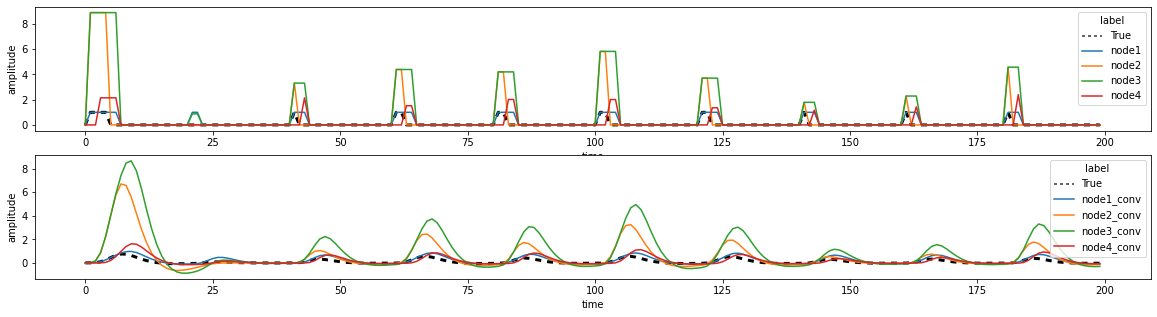

In [11]:
plt.rcParams["figure.figsize"][0] = 20
plt.rcParams["figure.figsize"][1] = 5
fig, a = plt.subplots(2, 1)
sns.lineplot(data=stim, x="time", y="amplitude", style=True, dashes=[(2,2)], color="black", linewidth=3, ax=a[0])
sns.lineplot(data=nodes, x="time", y = "amplitude", hue = "label",  ax=a[0])

sns.lineplot(data=stim_conv, x="time", y="amplitude", style=True, dashes=[(2,2)], color="black", linewidth=3, ax=a[1])
sns.lineplot(data=nodes_conv, x="time", y = "amplitude", hue = "label",  ax=a[1])